In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math
import matplotlib.pyplot as plt

%matplotlib inline

# Class for handling different files

In [2]:
class  Dataset:
    mu = 1.96197e-13 # just for FTODDUMP_MC
    t_quantile = 2.576 # for 99% prob --> see later
    
    def __init__(self, filename, co):
        self.fname = filename
        self.cutoff = co
        self.readFile() # "2018-11-18_01.txt"
        
    def printEntry(self, idx):
        print(np.array([self.x[idx], self.x_nbr[idx], self.mean[idx], self.var[idx], self.var_var[idx]]))
        

#### Read in file with data

In [3]:
def readFile(self):
    file  = open(self.fname, "r") 
    data = []
    x = []
    line = ""
    
    while (not line.startswith("0%") ):
        line = file.readline().rstrip("\n\r")    
        if line.startswith("maxi:"):
            self.n = int(line.split()[1])

    line += file.readline().rstrip("\n\r")
    lsplit = line.split()

    x.append(float(lsplit[0][:-2]))
    data.append([float(lsplit[2]),float(lsplit[5]),float(lsplit[7])])

    while ( lsplit[0] != "100%:"):
        line = file.readline().rstrip("\n\r")
        line += file.readline().rstrip("\n\r")
        lsplit = line.split()
        x.append(float(lsplit[0][:-2]))
        data.append([float(lsplit[2]),float(lsplit[5]),float(lsplit[7])])

    file.close()
    data = np.array(data)
    self.x = np.array(x)
    
    reOrgData(self, data)    

#### reorganize read data

`data`-array contains `[mean, var, var_var]`  


`[x:]` --> cutting of first two values  where offset is still huge

In [4]:
def reOrgData(self, data):
    cutoff = 1

    self.mean = data[:,0]
    self.var = data[:,1]
    self.var_var = data[:,1]

    self.x = self.x[self.cutoff:]
    self.mean = self.mean[self.cutoff:]
    self.var = self.var[self.cutoff:]
    self.var_var = self.var_var[self.cutoff:]
    
    self.x_nbr = self.x*self.n/self.x[-1]

#### bind functions to class

In [5]:
Dataset.readFile = readFile
Dataset.reOrgData = reOrgData

# Plots

$y_{err}$ is the standard deviation

$$y_{err} = \sqrt{\mathtt{Var}(y)} =   \sqrt { \frac { \sum _ { i = 1 } ^ { N } \left( x _ { i } - \overline { x } \right) ^ { 2 } } { N - 1 } }$$

In [6]:
def plotMean(lst):
    
    plt.figure(figsize=(16,8))
    plt.title('mean over # sampled ')
    plt.xlim(0, lst[0].x[-1])
    plt.grid(color='lightgray', linestyle='--', linewidth=0.7)
    
    plt.hlines(lst[0].mu,0, lst[0].x[-1], linestyle = 'dashed')
    
    #plt.ylim( min(min(i.mean) for i in ds) , max(max(i.mean) for i in lst) )
    #print(list(plt.yticks()[0]))
    #print(list(plt.yticks()[0]) + [lst[0].mu])
    #plt.yticks(list(plt.yticks()[0]) + [lst[0].mu])
    #print(list(plt.yticks()[0]))
    
    
    for self in lst:
        #plt.errorbar(self.x, self.mean,  yerr = np.sqrt(self.var/self.x_nbr), fmt= 'o', capsize=4)
        
        plt.plot(self.x, self.mean, marker = 'o', linestyle= 'solid')

###  Intervallschätzung
#### für $\alpha = 0.99$

Für den Spezialfall einer Normalverteilung können wir exakte Konfidenzintervalle angeben:  
Für $\mu$, wenn $\sigma^2$ bekannt ist:
$$ \left[ \overline { X } _ { n } - z _ { \frac { 1 + \gamma } { 2 } } \sqrt { \frac { \sigma ^ { 2 } } { n } } , \overline { X } _ { n } + z _ { \frac { 1 + \gamma } { 2 } } \sqrt { \frac { \sigma ^ { 2 } } { n } } \right] $$  

<br>

Für $\mu$ wenn $\sigma^2$ unbekannt ist:
$$\left[ \overline { X } _ { n } - t _ { n - 1 ; \frac { 1 + \gamma } { 2 } } \sqrt { \frac { S _ { n } ^ { 2 } } { n } } , \overline { X } _ { n } + t _ { n - 1 ; \frac { 1 + \gamma } { 2 } } \sqrt { \frac { S _ { n } ^ { 2 } } { n } } \right]$$  
Tabelle nur bis $n = 120$, danach $n = \infty$ verwendet. [Table](https://en.wikipedia.org/wiki/Student%27s_t-distribution#Table_of_selected_values)  
$\dfrac{1-\gamma}{2} = \dfrac{1.99}{2} = 0.995  \quad \Longrightarrow \quad t_{\infty, 0.995} = 2.576$

<br>

für $\sigma^2$:
$$\left[ \frac { ( n - 1 ) S _ { n } ^ { 2 } } { \chi _ { n - 1 ; \frac { 1 + \gamma } { 2 } } ^ { 2 } } , \frac { ( n - 1 ) S _ { n } ^ { 2 } } { \chi _ { n - 1 ; \frac { 1 - \gamma } { 2 } } ^ { 2 } } \right]$$

# where to put the var_var???

In [7]:
def MeanIntervallEst(lst):    
    
    plt.figure(figsize=(16,8))
    plt.title('mean with estimated intervall over # sampled ')
    plt.xlim(0, lst[0].x[-1])
    plt.grid(color='lightgray', linestyle='--', linewidth=0.7)
    
    plt.hlines(lst[0].mu,0, lst[0].x[-1], linestyle = 'dashed')
    
    #plt.ylim( min(min(i.mean) for i in ds) , max(max(i.mean) for i in lst) )
    #print(plt.yticks())
    
    
    for self in lst:
        var_deviantion = self.t_quantile*np.sqrt(self.var_var/self.x_nbr)
        mean_deviation = self.t_quantile*( np.sqrt(self.var/self.x_nbr) ) + ( var_deviantion )
        plt.errorbar(self.x, self.mean,  yerr = mean_deviation, fmt= 'o', capsize=4)
        plt.plot(self.x, self.mean, marker = 'o', linestyle= 'solid')

### Tests


Für den Mittelwert einer Normalverteilung, wenn $\sigma^2$ unbekannt ist:
$$T = \frac { \overline { X } _ { n } - \mu _ { 0 } } { \sqrt { S _ { n } ^ { 2 } / n } }$$  

$H _ { 0 } : \mu \leq \mu _ { 0 } $ gegen $ H _ { 1 } : \mu > \mu _ { 0 } : $ verwerfen, wenn $ T > t _ { n - 1 ; 1 - \alpha }$  
$H _ { 0 } : \mu \geq \mu _ { 0 } $ gegen $ H _ { 1 } : \mu < \mu _ { 0 } : $ verwerfen, wenn $ T < - t _ { n - 1 ; 1 - \alpha }$  
$H _ { 0 } : \mu = \mu _ { 0 } $ gegen $ H _ { 1 } : \mu \neq \mu _ { 0 } : $ verwerfen, wenn $ | T | > t _ { n - 1 ; 1 - \alpha / 2 }$

<br><br>  

Für die Varianz einer Normalverteilung:
$$T = \frac { ( n - 1 ) S _ { n } ^ { 2 } } { \sigma _ { 0 } ^ { 2 } }$$

$H _ { 0 } : \sigma ^ { 2 } \geq \sigma _ { 0 } ^ { 2 } $ gegen $ H _ { 1 } : \sigma ^ { 2 } < \sigma _ { 0 } ^ { 2 } : $ verwerfen, wenn $ T < \chi _ { n - 1 ; \alpha } ^ { 2 }$  
$H _ { 0 } : \sigma ^ { 2 } = \sigma _ { 0 } ^ { 2 } $ gegen $ H _ { 1 } : \sigma ^ { 2 } \neq \sigma _ { 0 } ^ { 2 } : $ verwerfen, wenn $ T > \chi _ { n - 1 ; 1 - \alpha / 2 } ^ { 2 } $ oder $ T < \chi _ { n - 1 ; \alpha / 2 } ^ { 2 }$  
$H _ { 0 } : \sigma ^ { 2 } \leq \sigma _ { 0 } ^ { 2 } $ gegen $ H _ { 1 } : \sigma ^ { 2 } > \sigma _ { 0 } ^ { 2 } : $ verwerfen, wenn $ T > \chi _ { n - 1 ; 1 - \alpha } ^ { 2 }$

In [8]:
def MeanTest(lst):
    
    plt.figure(figsize=(16,8))
    plt.title('mean test over # sampled ')
    plt.xlim(0, lst[0].x[-1])
    plt.grid(color='lightgray', linestyle='--', linewidth=0.7)
    plt.hlines(lst[0].t_quantile, 0, lst[0].x[-1], linestyle = 'dashed')
    plt.hlines(-lst[0].t_quantile, 0, lst[0].x[-1], linestyle = 'dashed')
    
    
    #plt.yticks(list(plt.yticks()) + [lst[0].t_quantile, -lst[0].t_quantile])    
    #print(plt.yticks())
    
    for self in lst:
        T = (self.mean-self.mu)/np.sqrt(self.var/self.x_nbr)
        plt.plot(self.x, T, marker = 'o', linestyle= 'solid')

In [9]:
def plot_var(lst):
    
    plt.figure(figsize=(16,8))
    plt.title('var over # sampled ')
    plt.grid(color='lightgray', linestyle='--', linewidth=0.7)
    
    
    #plt.yticks(list(plt.yticks()) + [lst[0].t_quantile, -lst[0].t_quantile])    
    #print(plt.yticks())
    
    for self in lst:
        plt.errorbar(self.x, self.var,  yerr = self.t_quantile*np.sqrt(self.var_var/self.x_nbr), fmt= 'o', capsize=4)
        plt.plot(self.x, self.var, marker = 'o', linestyle= 'solid')

# Main

In [10]:
Dset = []
#Dset.append(Dataset("2018-11-16_01.txt",1))
#set.append(Dataset("2018-11-18_01.txt",2))
#set.append(Dataset("2018-11-26_01.txt",2))
#set.append(Dataset("2018-11-26_02.txt",2))
#Dset.append(Dataset("2018-11-27_01.txt",2))
#Dset.append(Dataset("2018-11-27_02.txt",2))

# !!!!!!!!!!!! NEW statMod.* !!!!!!!!!!!!
Dset.append(Dataset("2018-11-30_01.txt",2))
Dset.append(Dataset("2018-12-01_01.txt",2))
#et.append(Dataset("2018-12-02_01.txt",2))

# sample one index
#Dset.append(Dataset("2018-12-03_02-1-IDX.txt",2))
#Dset.append(Dataset("2018-12-03_03-1-IDX.txt",2))

# other order of tensors
Dset.append(Dataset("2018-12-03_04-otherOrder.txt",2))
Dset.append(Dataset("2018-12-03_05-otherOrder.txt",2))

#set.append(Dataset("2018-12-04_01-Ord2310.txt",2))


#print(max(max(node.mean) for node in ds))

In [11]:
mean_r = []
var_runs = []
    
for self in Dset:
    mean_r.append(self.mean[-1])
    var_runs.append(self.var[-1])
        
mean_r = np.array(mean_r)
print(np.mean(mean_r))
print(mean_r)
print(np.var(mean_r))



1.961485e-13
[1.96213e-13 1.96124e-13 1.96017e-13 1.96240e-13]
7.606250000000728e-33


In [12]:
nbrEntriesOfDsets = [Dset[i].n for i in range(len(Dset))]
nbrEntriesOfDsets = np.array(nbrEntriesOfDsets)
print(nbrEntriesOfDsets)

if not np.all(nbrEntriesOfDsets == nbrEntriesOfDsets[0]):
    print("<br>!!!!!!!!!!!!!!!!!!!!!! NOT ALL DATASETS HAVE THE SAME ENTRY NUMBER !!!!!!!!!!!!!!!!!!!!!!<br>")

#ds = [Dset[i] for i in [3] ]
ds = Dset

[299007737856 299007737856 299007737856 299007737856]


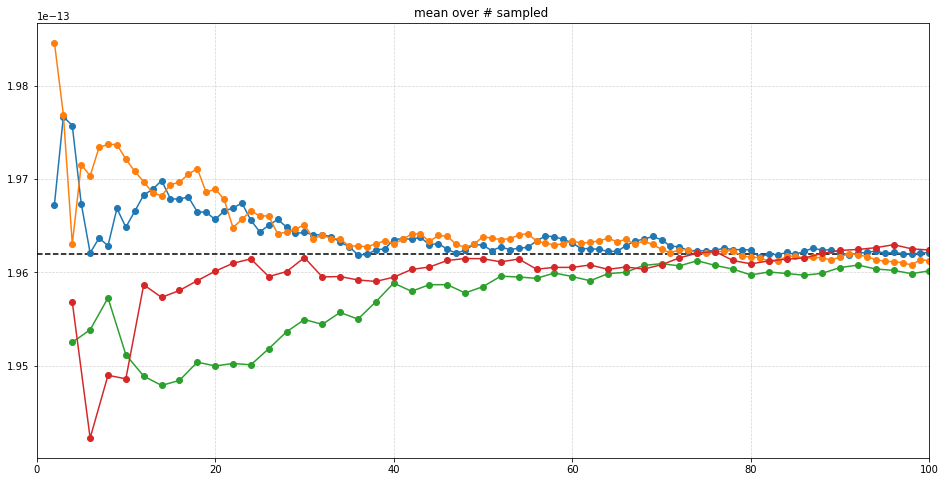

In [13]:
plotMean(ds)
plt.show()

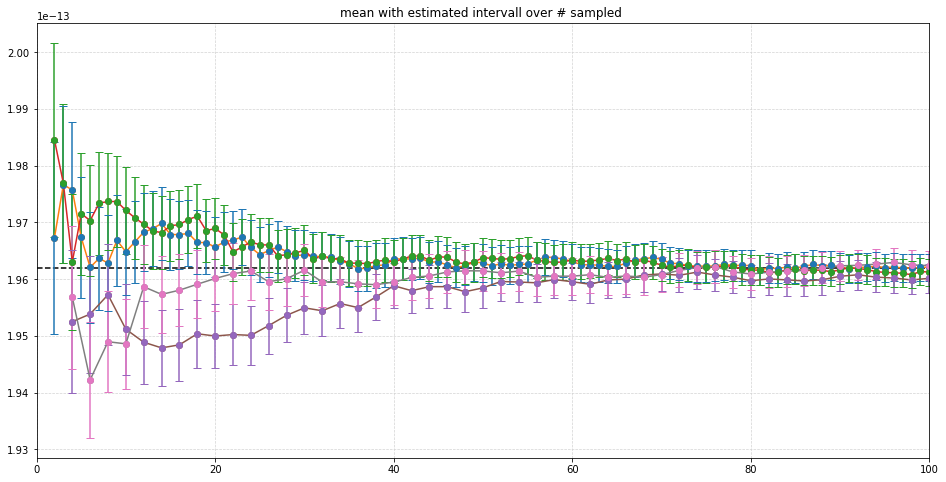

In [14]:
MeanIntervallEst(ds)
plt.show()

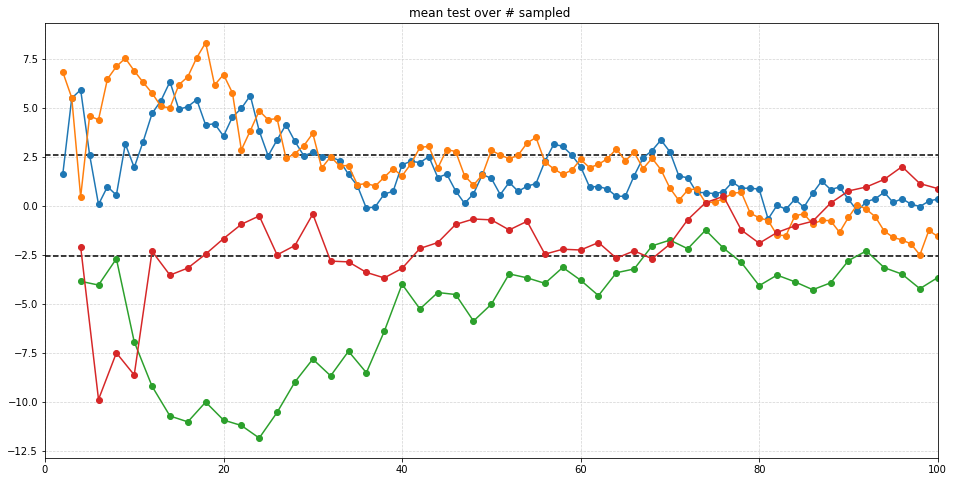

In [15]:
MeanTest(ds)
plt.show()

In [16]:
plot_var(ds)
plt.show()

In [70]:
def sampleLin(idx):
    f = 0
    w = []
    ww = []
    for i in range(np.prod(idx.shape)):
        w.append(i)
        ww.append(np.power(2,i))
    w = np.array(w)
    ww = np.array(ww)
    #print(idx)
    #print(w, ww)
    wIdx = idx*(w)
    #print(wIdx)
    #print(np.sum(wIdx), np.sum(wIdx)+np.sum(idx), np.sum(wIdx)+(np.sum(idx)-1))
    #print(np.sum(wIdx)+(np.sum(idx) - (1 if np.sum(idx) == 1 else 0)))
    print(idx, np.sum(idx*ww)-1)
    
a = np.array([1,0,0])
sampleLin(a)
a = np.array([0,1,0])
sampleLin(a)
a = np.array([0,0,1])
sampleLin(a)

a = np.array([1,1,0])
sampleLin(a)
a = np.array([1,0,1])
sampleLin(a)
a = np.array([0,1,1])
sampleLin(a)

a = np.array([1,1,1])
sampleLin(a)


print('########### more dimensions ###########')
sampleLin(np.array([1,0,0,0]))
sampleLin(np.array([0,1,0,0]))
sampleLin(np.array([1,1,0,0]))
sampleLin(np.array([0,0,1,0]))
sampleLin(np.array([1,0,1,0]))
sampleLin(np.array([0,1,1,0]))
sampleLin(np.array([1,1,1,0]))
sampleLin(np.array([0,0,0,1]))
sampleLin(np.array([1,0,0,1]))
sampleLin(np.array([0,1,0,1]))
sampleLin(np.array([1,1,0,1]))
sampleLin(np.array([0,0,1,1]))
sampleLin(np.array([1,0,1,1]))
sampleLin(np.array([0,1,1,1]))
sampleLin(np.array([1,1,1,1]))


[1 0 0] 0
[0 1 0] 1
[0 0 1] 3
[1 1 0] 2
[1 0 1] 4
[0 1 1] 5
[1 1 1] 6
########### more dimensions ###########
[1 0 0 0] 0
[0 1 0 0] 1
[1 1 0 0] 2
[0 0 1 0] 3
[1 0 1 0] 4
[0 1 1 0] 5
[1 1 1 0] 6
[0 0 0 1] 7
[1 0 0 1] 8
[0 1 0 1] 9
[1 1 0 1] 10
[0 0 1 1] 11
[1 0 1 1] 12
[0 1 1 1] 13
[1 1 1 1] 14
